In [1]:
from IPython.display import display, Markdown, clear_output, HTML, Javascript
import ipywidgets as ipw
import json
import subprocess
import atexit
import os
import re
import shutil
import pandas as pd

import sys
sys.path.append("ai_agent")
from ai_agent import single_agent
from src import widgets, utils
import markdown

In [2]:
CONFIG = utils.read_json("schema/config.json")
OPENBIS_SESSION, SESSION_DATA = utils.connect_openbis_aiida()
LLM_API_KEY = utils.read_json("/home/jovyan/api_keys/gemini_api.json")
# LLM_API_KEY = utils.read_json("/home/jovyan/api_keys/openrouter_api.json")

openbis_chatbot = single_agent.OpenBISAgent(
    llm_api_key=LLM_API_KEY["api_key"]
)

E0000 00:00:1758920658.286146   85462 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [3]:
increase_buttons_size = HTML(data = ''.join(CONFIG["save_home_buttons_settings"]))

prompt_label = ipw.HTML(value = "<span style='font-weight: bold; font-size: 12px;'>Prompt:</span>")

prompt_textarea = ipw.Textarea(
    layout = ipw.Layout(width = '800px', height = '100px'),
    style = {"description_width": "110px"}
)

enter_button = ipw.Button(
    description = '', disabled = False, button_style = '', 
    tooltip = 'Enter', icon = 'arrow-right', layout = ipw.Layout(width = '100px', height = '50px')
)

prompt_hbox = ipw.HBox(
    children = [
        prompt_label,
        prompt_textarea,
        enter_button
    ]
)

chat_label = ipw.HTML(value = "<span style='font-weight: bold; font-size: 12px;'>Chat:</span>")
chat_html = ipw.HTML(value = "<div style='border: 1px solid grey; padding: 10px; margin: 10px;'> <p><b>Agent:</b> Hi! I am openBIS chatbot and I am here to answer your questions about openBIS. How may I help you today?")
chat_hbox = ipw.HBox(children = [chat_label, chat_html])

quit_button = ipw.Button(
    description = '', disabled = False, button_style = '', 
    tooltip = 'Main menu', icon = 'home', layout = ipw.Layout(width = '100px', height = '50px')
)

In [4]:
def close_notebook(b):
    display(Javascript(data = 'window.location.replace("home.ipynb")'))

def log_chatbot_usage(filepath, json_data):
    input_tokens = json_data["input_tokens"]
    output_tokens = json_data["output_tokens"]

    os.makedirs("logs", exist_ok=True)
    filepath = os.path.join("logs", filepath)
    
    if os.path.isfile(filepath) == False:
        with open(filepath, "w") as f:
            f.write("input_tokens,output_tokens\n")
            f.write(f"{input_tokens},{output_tokens}\n")
    else:
        with open(filepath, "a") as f:
            f.write(f"{input_tokens},{output_tokens}\n")
    
def ask_chatbot(change):
    prompt = prompt_textarea.value
    chat_html.value = chat_html.value + f"<p><b>User:</b> {prompt}</p>"
    agent_response = openbis_chatbot.ask_question(prompt)
    response_text = agent_response[-1].content
    log_chatbot_usage("chatbot_usage.csv", agent_response[-1].usage_metadata)
    # try:
    #     agent_response = openbis_agent.ask_question(prompt)
    #     response_text = agent_response[-1].content
    # except Exception as e:
    #     response_text = "Internal Server Error. Repeat your prompt."
    chat_html.value = chat_html.value + "<p><b>Agent:</b> " + markdown.markdown(response_text) + "</p>"

In [ ]:
# agent_response = openbis_chatbot.ask_question("Get me more details about that")

In [ ]:
# openbis_chatbot.messages

{'messages': [{'role': 'user', 'content': 'Get me substance 704a'},
  {'role': 'user', 'content': 'Get me substance 704a'},
  {'role': 'assistant', 'content': ''},
  {'role': 'assistant',
   'content': 'The permID of substance 704a is 20250922155822064-2489.'},
  {'role': 'user', 'content': 'Get me more details about that'},
  {'role': 'user', 'content': 'Get me more details about that'},
  {'role': 'assistant', 'content': ''},
  {'role': 'assistant',
   'content': "OK. Here are the details for substance 704a (PermID: 20250922155822064-2489):\n\n*   **Name:** TUD-156\n*   **Empa Number:** 704\n*   **Batch:** a\n*   **Description:** ~1mg powder\n*   **Molecules:**\n    *   **Name:** 704\n    *   **SMILES:** Brc1ccc(-c2c(C3=Cc4ccccc4C3)c(-c3ccc(Br)cc3)c(C3=Cc4ccccc4C3)c(-c3ccc(Br)cc3)c2C2=Cc3ccccc3C2)cc1\n    *   **Sum Formula:** C51H33Br3\n*   **Supplier:** Prof. Xinliang Feng Group\n*   **Synthesized by:** Renxiang Lu\n*   **Receive Date:** 2025-05-07\n\nIs there anything else you'd li

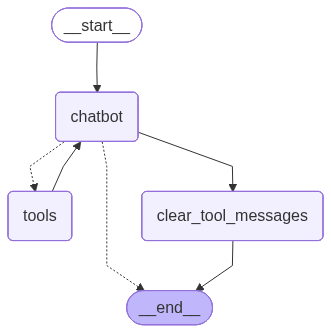

In [ ]:
# openbis_chatbot.graph

# openBIS chatbot

#### Note: This agent uses model Gemini Flash 2.5. The answers may contain some errors/hallucinations.

In [ ]:
display(increase_buttons_size)
display(chat_hbox)
display(prompt_hbox)
display(quit_button)
enter_button.on_click(ask_chatbot)
quit_button.on_click(close_notebook)